# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023
### **Aluno 2:** Samir Saliba
### **Matrícula 1:** 2023

### **Tema:**
### **Base de dados:** [link](https://drive.google.com/drive/folders/1qeFJoe3Xb6XheJ91ynMauPMv-nh1_Wt6?usp=share_link)


In [ ]:
#Bibliotecas usadas no projeto


##**2. Data understanding (Entendimento dos dados)**


Nesta fase, o objetivo é carregar os dados e fazer um entendimento preliminar de suas características.

In [ ]:
#Carregando a base de dados

In [11]:
import os
import pandas as pd

# Directory containing the data files

# INICIO CODIGO ALTERADO
#  data_directory = "path/to/data"
# FIM CODIGO ALTERADO
# INÍCIO CODIGO MANUAL
data_directory = 'data'
# FIM CODIGO MANUAL



# Get a list of all files in the data directory
files = os.listdir(data_directory)

# Create an empty list to store all DataFrames
all_data = []

# Load all samples
for file in files:
    file_path = os.path.join(data_directory, file)
    df = pd.read_excel(file_path)
    df['type'] = os.path.splitext(file)[0]  # Extract filename without extension
    all_data.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(all_data, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print("Concatenated Data:")
print(combined_df.head())

Concatenated Data:
   Unnamed: 0  Cell Segment Area  Cell Segment Circularity   
0           0      142805.745921                  0.321311  \
1           1       48578.883462                  0.505462   
2           2       41183.449758                  0.317946   
3           3       34917.665784                  0.553840   
4           4       26372.095319                  0.462444   

   Cell Segment Coverage  Cell Segment Eccentricity   
0               0.691372                   0.530085  \
1               0.722954                   0.604810   
2               0.670544                   0.824535   
3               0.657257                   0.659041   
4               0.634079                   0.773780   

   Cell Segment PL Angle SDI  Cell Segment PL Coherence   
0                   0.015405                   0.034232  \
1                   0.010873                   0.022148   
2                   0.010842                   0.026400   
3                   0.010987             

Aqui, executamos o comando `df.info` para alimentar a LLM

In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1384 non-null   int64  
 1   Cell Segment Area                  1384 non-null   float64
 2   Cell Segment Circularity           1384 non-null   float64
 3   Cell Segment Coverage              1384 non-null   float64
 4   Cell Segment Eccentricity          1384 non-null   float64
 5   Cell Segment PL Angle SDI          1384 non-null   float64
 6   Cell Segment PL Coherence          1384 non-null   float64
 7   Cell Segment PL Entropy            1384 non-null   float64
 8   Cell Segment PL Local Coherence    1384 non-null   float64
 9   Cell Segment PL Mean               1384 non-null   float64
 10  Cell Segment PL STD                1384 non-null   float64
 11  Fibre Angle SDI                    1384 non-null   float

Primeiro, fazemos um overview geral dos dados, observando como são os valores de cada coluna e suas estatísticas básicas - média, desvio padrão, mínimo, máximo, etc.:

In [13]:
# Display the first few rows of the DataFrame
print("First Few Rows:")
print(combined_df.head())

# Display basic statistics
print("\nBasic Statistics:")
print(combined_df.describe())


First Few Rows:
   Unnamed: 0  Cell Segment Area  Cell Segment Circularity   
0           0      142805.745921                  0.321311  \
1           1       48578.883462                  0.505462   
2           2       41183.449758                  0.317946   
3           3       34917.665784                  0.553840   
4           4       26372.095319                  0.462444   

   Cell Segment Coverage  Cell Segment Eccentricity   
0               0.691372                   0.530085  \
1               0.722954                   0.604810   
2               0.670544                   0.824535   
3               0.657257                   0.659041   
4               0.634079                   0.773780   

   Cell Segment PL Angle SDI  Cell Segment PL Coherence   
0                   0.015405                   0.034232  \
1                   0.010873                   0.022148   
2                   0.010842                   0.026400   
3                   0.010987                

Checamos se existem valores nulos:

In [14]:
# Check for missing values
print("\nMissing Values:")
print(combined_df.isnull().sum())


Missing Values:
Unnamed: 0                           0
Cell Segment Area                    0
Cell Segment Circularity             0
Cell Segment Coverage                0
Cell Segment Eccentricity            0
Cell Segment PL Angle SDI            0
Cell Segment PL Coherence            0
Cell Segment PL Entropy              0
Cell Segment PL Local Coherence      0
Cell Segment PL Mean                 0
Cell Segment PL STD                  0
Fibre Angle SDI                      0
Fibre Network Connectivity           0
Fibre Network Cross-Link Density     0
Fibre Network Degree                 0
Fibre Network Eigenvalue             0
Fibre Segment Area                   0
Fibre Segment Circularity            0
Fibre Segment Coverage               0
Fibre Segment Eccentricity           0
Fibre Segment SHG Angle SDI          0
Fibre Segment SHG Coherence          0
Fibre Segment SHG Entropy            0
Fibre Segment SHG Local Coherence    0
Fibre Segment SHG Mean               0
Fibre Se

##**3. Data preparation (Preparação dos dados)**

Na etapa de preparação dos dados, é importante garantir a integridade e usabilidade dos dados para modelagem.
As seguintes ações foram realizadas:
- Excluímos as colunas indesejadas, como o index (coluna 0) e File
- Separamos os dados entre X e Y, pois nesse caso possuímos o rótulo real das classes, o que geralmente não acontece em aprendizado não-supervisionado
- Preenchemos as células nulas com o valor médio da coluna - embora esses dados não possuam nulos, como visto anteriormente, mas decidimos manter o código sugerido
- Normalizamos os dados pela média e variância
- Extraímos 10 componentes principais via PCA, o que reduz a dimensionalidade e pode ser interessante tendo em vista que várias variáveis são muito correlacionadas

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Load your dataset
# Assuming your DataFrame is named 'df'
# If it's stored in a CSV file, you can use: df = pd.read_csv('your_file.csv')

# Drop unnecessary columns
# INÍCIO CODIGO MANUAL
# A linha abaixo foi alterada para NÃO dropar a coluna "type"
columns_to_drop = ['Unnamed: 0', 'File'] #, 'type']
# FIM CODIGO MANUAL
combined_df = combined_df.drop(columns=columns_to_drop)

# Separate features and target variable

# INÍCIO CODIGO MANUAL
# A linha abaixo foi feita pelo chatGPT e desconsiderada pois não faz sentido excluir essas colunas
# X = combined_df.drop(columns=['No. Cells', 'No. Fibres'])  # Features
# Alteramos para apenas excluir o "type", que é o rótulo da classe
X = combined_df.drop(columns=['type'])
# FIM CODIGO MANUAL

y = combined_df['type']  # Target variable

# Handling missing values (if any)
# You can customize the strategy based on your data
# Here, I'm using the mean value to fill missing numerical values
numerical_features = X.select_dtypes(include=['float64']).columns
numerical_transformer = SimpleImputer(strategy='mean')

# Create a preprocessor to scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Create a pipeline with preprocessing and clustering
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=10))  # Apply PCA for dimensionality reduction
])

# Fit and transform the pipeline on your data
X_preprocessed = pipeline.fit_transform(X)

# Now, X_preprocessed contains the preprocessed data that you can use for clustering


##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

Para a etapa de modelagem, é interessante iterar entre diferentes modelos e parâmetros a fim de encontrar melhores resultados. Nesse caso, inicialmente escolhemos o KMeans como baseline e diferentes valores de _k_ são utilizados para produzir agrupamentos. É utilizada a métrica de "silhueta" (silhouette_score) para quantificar os melhores valores e buscar o "cotovelo" na curva de métrica de silhueta versus k.
Utilizando a métrica de cotovelo, valores interessantes para k seriam de 4 ou 8 clusteres, que apresentam o "cotovelo" no gráfico. Entretanto, como sabemos que são 5 classes reais, faz mais sentido usar k=5.

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the average silhouette score is: 0.165060924251488


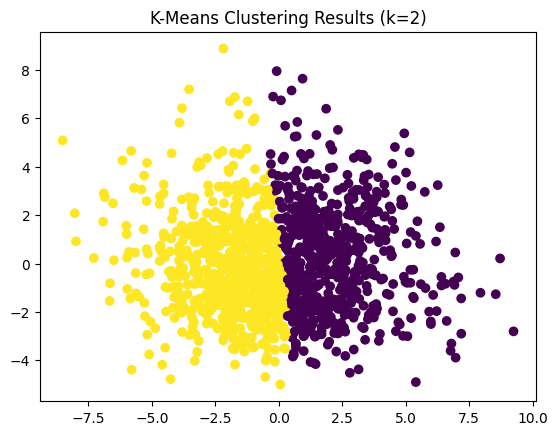

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the average silhouette score is: 0.14072639621438027


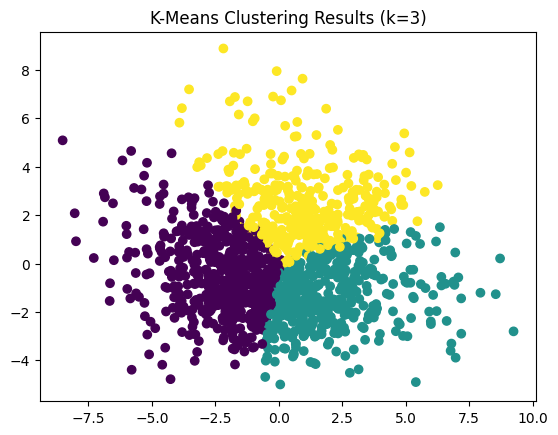

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the average silhouette score is: 0.12073079155970246


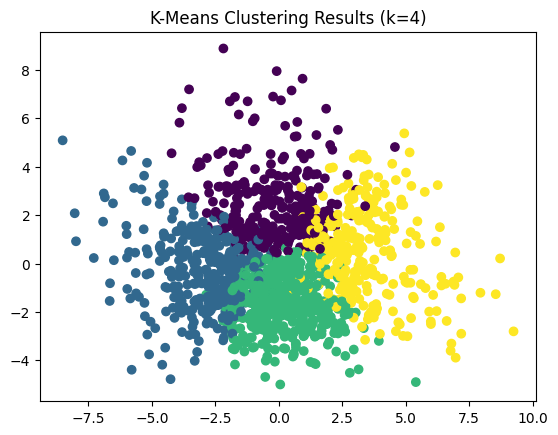

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the average silhouette score is: 0.1262132502099991


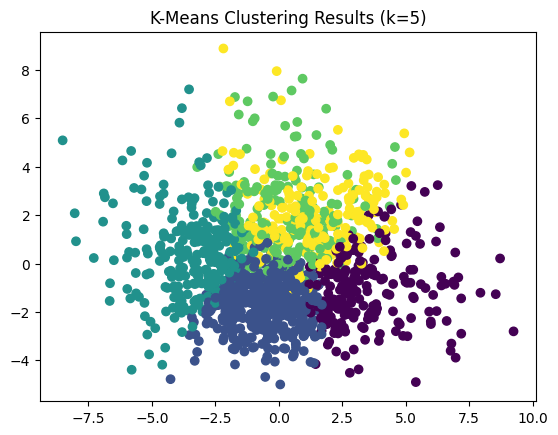

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the average silhouette score is: 0.12502926228094122


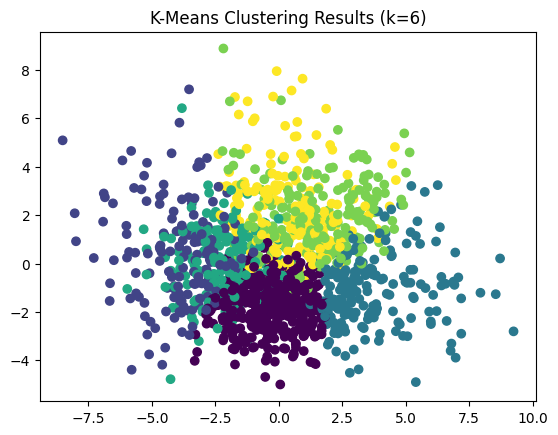

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the average silhouette score is: 0.11987585660488763


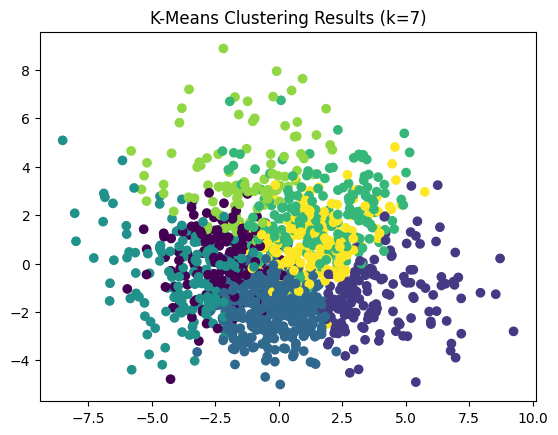

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the average silhouette score is: 0.10818616775910771


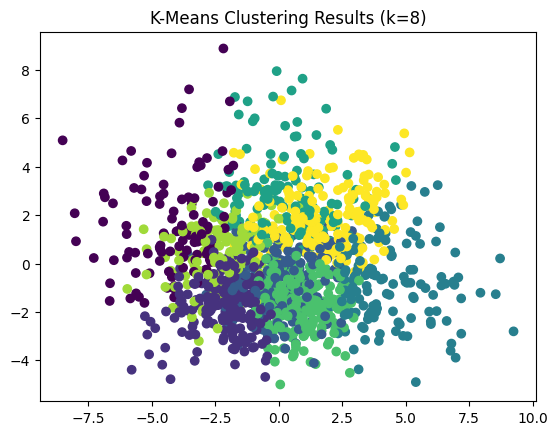

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the average silhouette score is: 0.10753847759136262


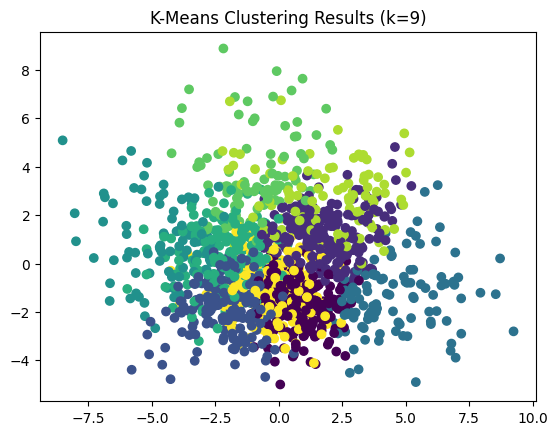

C:\Users\samir\miniconda3\envs\dataviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, the average silhouette score is: 0.11080568456516969


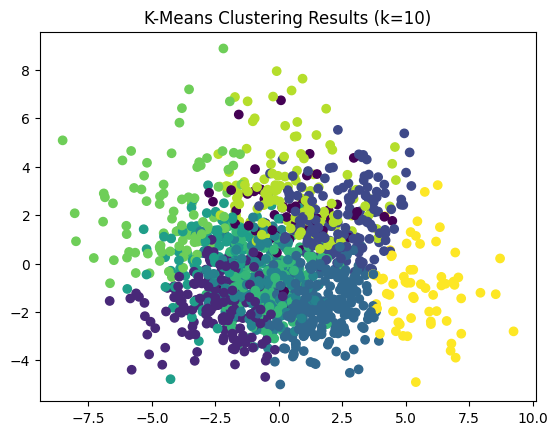

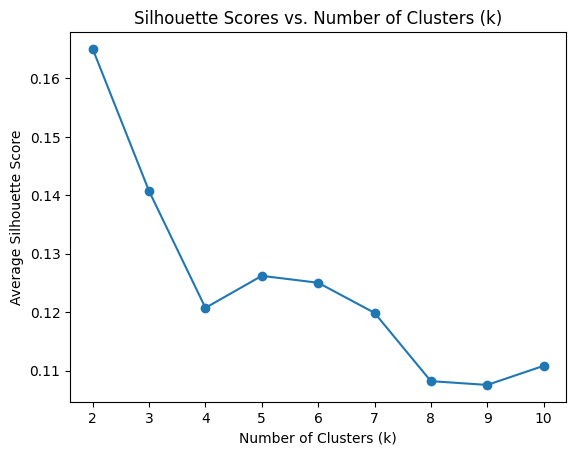

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already loaded X_preprocessed and y
# If not, you can load your data here.

# Assuming X_preprocessed is a numpy array and y is a pandas Series

# Perform PCA (if not done already)
# You mentioned PCA is already done, but in case you need to do it again, you can use the following code
# pca = PCA(n_components=10)
# X_preprocessed = pca.fit_transform(X_preprocessed)

# Function to perform K-Means clustering and evaluate the results
def perform_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Evaluate clustering using silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")
    # INÍCIO CODIGO MANUAL
    # Apenas combinamos 2 prompts para mostrar os 2 plots
    return silhouette_avg, cluster_labels
    # FIM CODIGO MANUAL
# Store silhouette scores for different values of k
k_values = range(2, 11)
silhouette_scores = []

for n_clusters in k_values:
    silhouette_avg, cluster_labels = perform_kmeans(X_preprocessed, n_clusters)
    silhouette_scores.append(silhouette_avg)
    # INÍCIO CODIGO MANUAL
    # Apenas combinamos 2 prompts para mostrar os 2 plots
    plt.scatter(X_preprocessed[:, 0], X_preprocessed[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'K-Means Clustering Results (k={n_clusters})')
    plt.show()
    # FIM CODIGO MANUAL

# Plot silhouette scores vs k
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.